# Report: Traffic accidents in Berlin

This project analyzes traffic accidents in Berlin in 2021. It examines what types of accidents are most common and attempts to identify times and areas with particularly high accident occurrences. Additionally, sensor data is used to investigate the effect of traffic on the number and severety of accidents. This way it aims to suggest strategies to prevent traffic accidents.

## Install dependencies
Initially, install all required dependencies.

In [ ]:
%pip install pandas
%pip install plotly
%pip install nbformat
%pip install -U kaleido

In [370]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px

In [371]:
sns.set_palette('Set2')

# Accident data

The dataset provides information on traffic accidents that occurred in Berlin during 2021. It includes various details for each road accident, such as the location (district and coordinates), timing (month, day, hour), and the vehicles involved. Further, the acccidents are classified by their severity and type. 

As part of the data pipeline, columns with no value for this analyisis have been dropped and the values of categorical columns have been renamed for easier understanding. Additionally, a new column has been created to indicate all the vehicles involved in each accident, derived from the original one-hot encoded columns.

## Load data

In [372]:
accidents = pd.read_sql_table('accidents', 'sqlite:///../accidents.sqlite')
accidents.head()

,OBJECTID,BEZ,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,UART,UTYP1,ULICHTVERH,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,USTRZUSTAND,XGCSWGS84,YGCSWGS84,BETEILIGT
0,219249,Pankow,2021,11,18,Monday,with lightly injured,0,crossing,darkness,0,1,0,1,0,0,wet,13.426895,52.533940,PKW-Krad
1,219248,Tempelhof-Schöneberg,2021,12,19,Saturday,with lightly injured,6,turning,darkness,0,1,1,0,0,0,wet,13.392090,52.439951,PKW-Fuss
2,219247,Charlottenburg-Wilmersdorf,2021,12,17,Wednesday,with lightly injured,5,turning,darkness,0,1,0,0,0,0,dry,13.326242,52.538028,PKW
3,219246,Charlottenburg-Wilmersdorf,2021,12,15,Saturday,with lightly injured,5,turning,dawn,0,1,0,1,0,0,wet,13.316521,52.499534,PKW-Krad
4,219243,Lichtenberg,2021,12,9,Thursday,with lightly injured,3,in longitudinal traffic,daylight,0,1,0,0,0,1,iced,13.525752,52.493867,PKW-Sonstige


## What type of accidents happend?

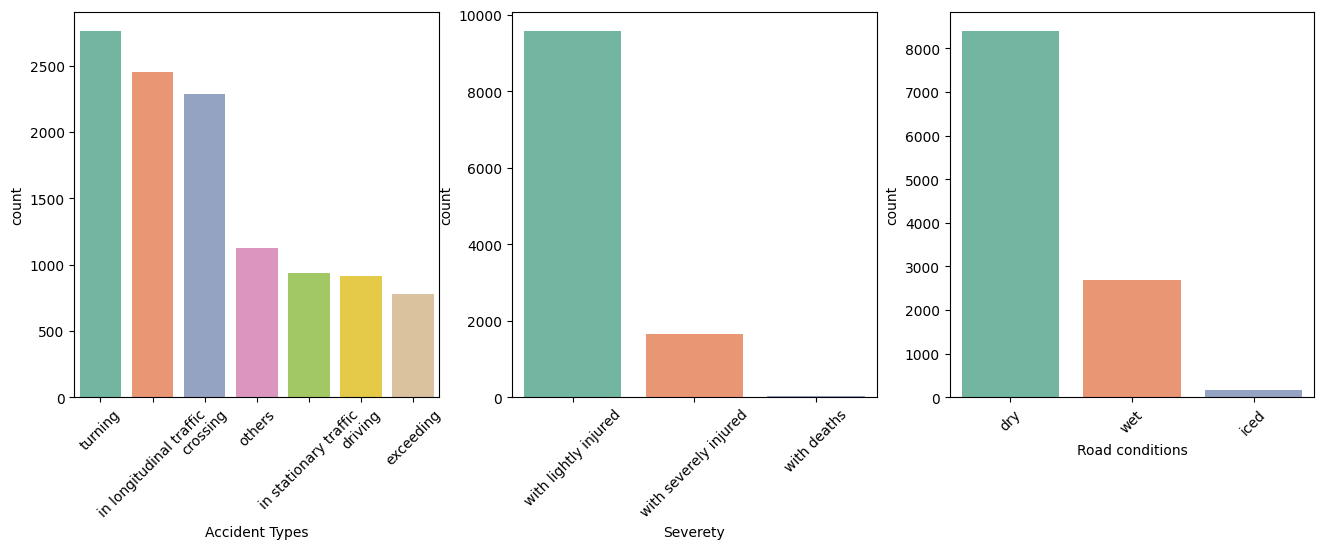

In [373]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.countplot(x='UTYP1', data=accidents, order=accidents['UTYP1'].value_counts().index, ax=axes[0])
sns.countplot(x='UKATEGORIE', data=accidents, order=accidents['UKATEGORIE'].value_counts().index, ax=axes[1])
sns.countplot(x='USTRZUSTAND', data=accidents, order=accidents['USTRZUSTAND'].value_counts().index, ax=axes[2])
for ax in fig.axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
axes[0].set_xlabel('Accident Types')
axes[1].set_xlabel("Severety")
axes[2].set_xlabel("Road conditions")

plt.show()

Many accidents happened while turning, crossing or changing lanes. Fortunately, only a few accidents are serious and hardly any are deadly.

Between which types of road users do most accidents occur?

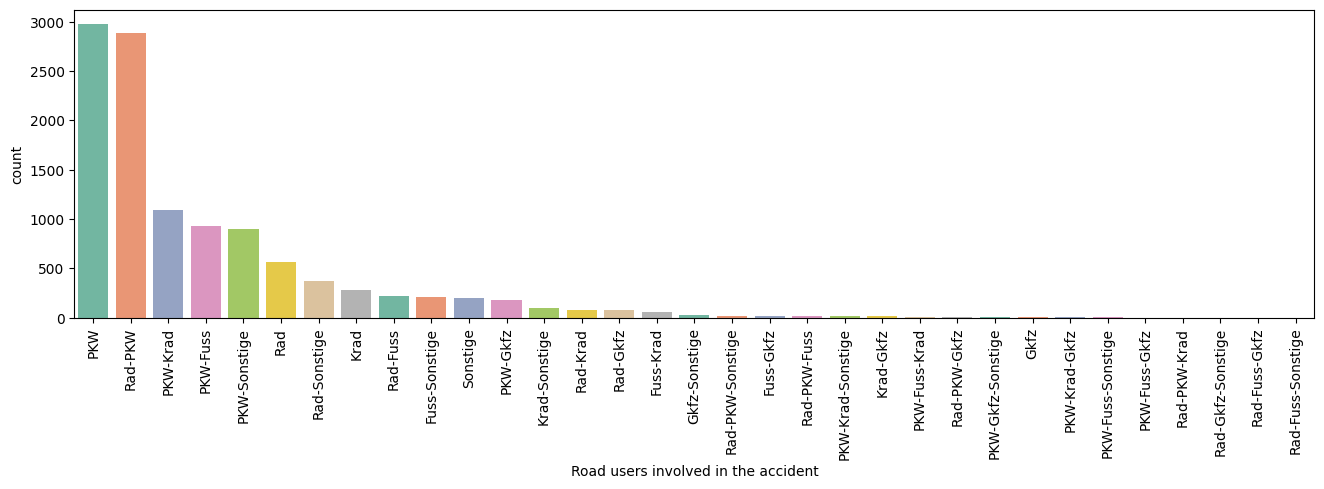

In [374]:
f, ax = plt.subplots(figsize=(16, 4))
sns.countplot(x='BETEILIGT', data=accidents, order=accidents['BETEILIGT'].value_counts().index, palette='Set2')
plt.xticks(rotation='vertical')
plt.xlabel('Road users involved in the accident')
plt.show()

Apparently in most accidents there was a PKW involved and the most common accident is with one or more PKW and no other vehicles. What is also interesting is, that there were almost as many accidents between PKWs and bikes as with only PKW. 
Since this type of accident can be particularly dangerous, we now look at a subset of the dataframe to see who is most involved in deadly accidents.

In [375]:
deaths = accidents[accidents['UKATEGORIE'] == 'with deaths']

Number of deadly accidents in 2021:

In [376]:
print(len(deaths))

31


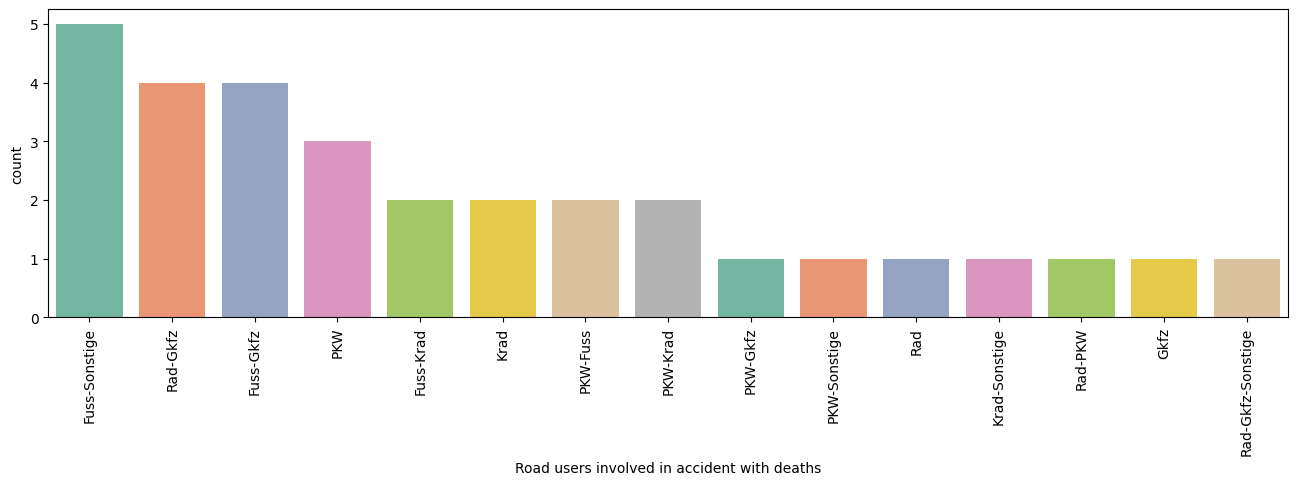

In [377]:
f, ax = plt.subplots(figsize=(16, 4))
sns.countplot(x='BETEILIGT', data=deaths, order=deaths['BETEILIGT'].value_counts().index, palette='Set2')
plt.xticks(rotation='vertical')
plt.xlabel('Road users involved in accident with deaths')
plt.show()

It is noticeable that deadly accidents often happened between pedestrians or cyclists and bigger vehicles like trucks (Gfks). However, the most frequent accidents were between pedestrians and 'others' which in this case are for example buses and trams. 

## When did the accidents happen?

Number of accidents every months

In [378]:
accidents.groupby(["UMONAT"]).OBJECTID.count()

UMONAT
1      481
2      436
3      765
4      720
5      991
6     1314
7     1053
8     1274
9     1300
10    1130
11    1007
12     796
Name: OBJECTID, dtype: int64

There were significantly more accidents in the summer than in the winter. The highest number was reached in June with 1314 accidents.

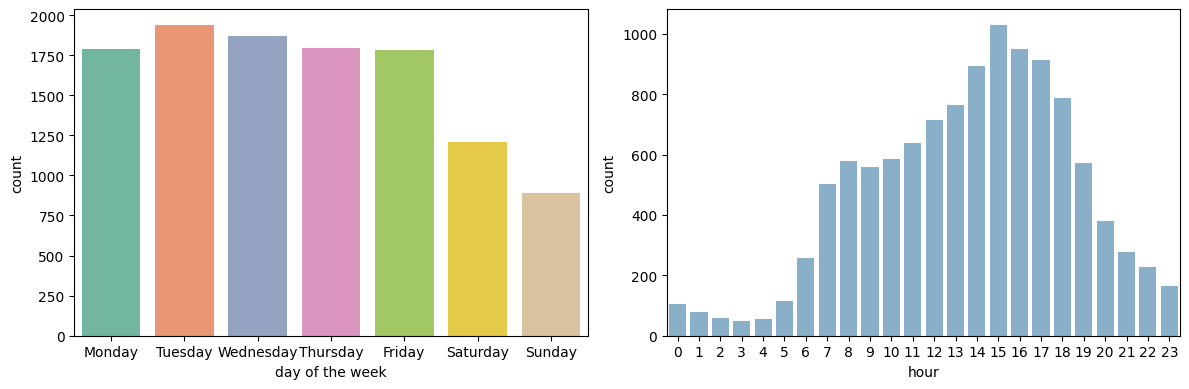

In [379]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.countplot(x='UWOCHENTAG', data=accidents, order = days, ax=axes[0])
sns.countplot(x='USTUNDE', data=accidents, ax=axes[1], color='#80B1D3')

axes[0].set_xlabel("day of the week")
axes[1].set_xlabel('hour')

plt.tight_layout()
plt.show()

We also see that significantly less happened on weekends than during the week. The fact that many accidents occur between 2pm and 5pm also indicates that rush hour traffic plays a major role. 

## Where did the accidents happen?
First of all we have a look at the different districts and the amount of accidents there

In [380]:
accidents['BEZ'].value_counts()

Mitte                         1761
Charlottenburg-Wilmersdorf    1398
Friedrichshain-Kreuzberg      1107
Tempelhof-Schöneberg          1059
Pankow                        1011
Neukölln                       799
Treptow-Köpenick               776
Steglitz-Zehlendorf            757
Reinickendorf                  729
Spandau                        713
Lichtenberg                    619
Marzahn-Hellersdorf            538
Name: BEZ, dtype: int64

Most of the accidents occurred in Berlin Mitte. The other districts that have over 1000 accidents border on Mitte and are centrally located in the city.  

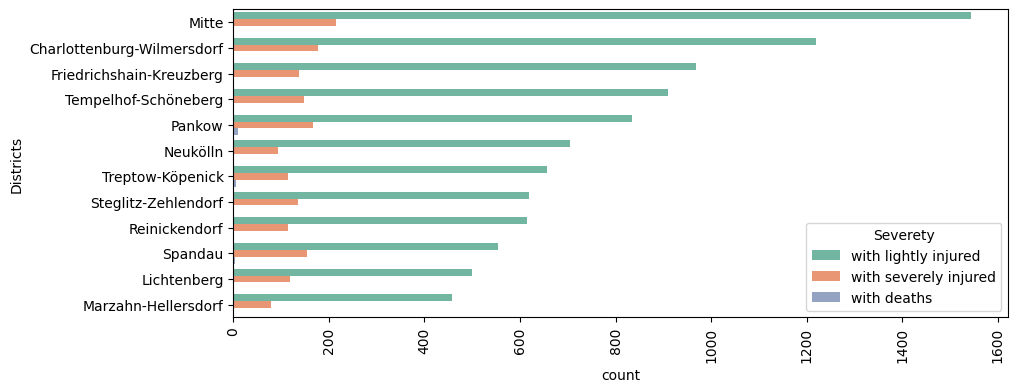

In [381]:
f, ax = plt.subplots(figsize=(10, 4))
sns.countplot(y='BEZ', data=accidents, hue = 'UKATEGORIE', order=accidents['BEZ'].value_counts().index)
plt.xticks(rotation='vertical')
plt.ylabel('Districts')
legend = plt.gca().get_legend()
legend.set_title('Severety')
plt.show()

Apparently, more accidents happen in the central districts, but they are comparatively rarely serious or fatal.

### Visualize cooridnates on map

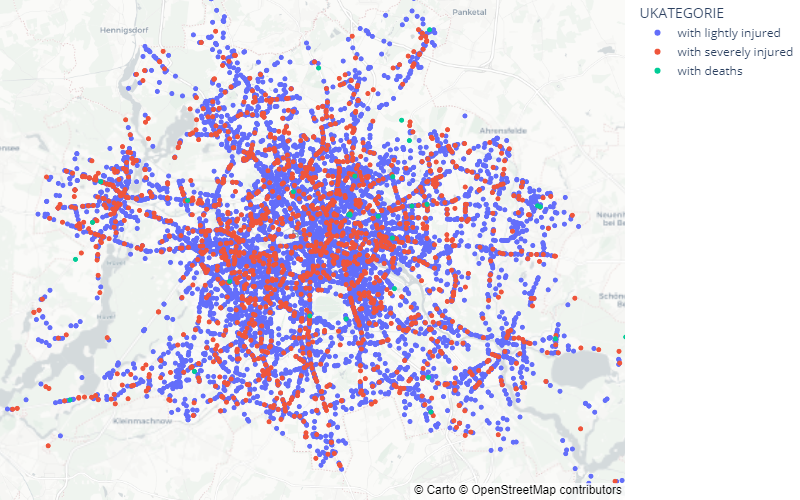

In [382]:
fig = px.scatter_mapbox(accidents, 
                        lat="YGCSWGS84", 
                        lon="XGCSWGS84", 
                        hover_name="OBJECTID", 
                        hover_data=["BEZ", "USTRZUSTAND", "UMONAT"],
                        color="UKATEGORIE",
                        zoom=9.5, 
                        height=500,
                        width=800)

fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
fig.show("png") #display as image as well as interactive map is not displayed in github

# Traffic sensor data

This dataset comprises traffic data for Berlin that was collected using detectors. The data includes information on the average number of cars and trucks passing through each hour, as well as the average speed recorded by the detectors. In the data pipeline, additional metadata, such as their location, was incorporated for each sensor.

As the hourly traffic sensor data for the whole year resulted in a huge dataset, it had to be reduced.
This has been done in two ways:
1. Limit time frame to one month: Since the data exploration has shown that most accidents happend in June we will take a closer look at the traffic in June 2021.
2. Aggregate the data: To analyse the traffic of the whole year 2021 the hourly data has been aggregated to daily averages for every sensor.

## Hourly traffic data for June 2021

In [383]:
traffic_june = pd.read_sql_table('traffic_month', 'sqlite:///../traffic.sqlite')
traffic_june.head()

,detid_15,tag,stunde,qualitaet,q_kfz_det_hr,v_kfz_det_hr,q_pkw_det_hr,v_pkw_det_hr,q_lkw_det_hr,v_lkw_det_hr,...,MQ_ID15,STRASSE,POSITION,POS_DETAIL,RICHTUNG,SPUR,annotation,LÄNGE (WGS84),BREITE (WGS84),INBETRIEBNAHME
0,100101010001076,2021-06-01,0,0.83,24,42,17,42,7,42,...,100201010000481,Berliner Straße,"zwischen Seehofstraße und Gartenstraße, in Höh...",Clayallee,West,HF_R,Hauptfahrbahn rechte Spur,13.263106,52.435112,2003-02-19
1,100101010001076,2021-06-01,2,0.75,21,41,20,40,1,61,...,100201010000481,Berliner Straße,"zwischen Seehofstraße und Gartenstraße, in Höh...",Clayallee,West,HF_R,Hauptfahrbahn rechte Spur,13.263106,52.435112,2003-02-19
2,100101010001076,2021-06-01,3,0.92,15,51,10,46,5,62,...,100201010000481,Berliner Straße,"zwischen Seehofstraße und Gartenstraße, in Höh...",Clayallee,West,HF_R,Hauptfahrbahn rechte Spur,13.263106,52.435112,2003-02-19
3,100101010001076,2021-06-01,4,0.92,56,56,46,56,10,55,...,100201010000481,Berliner Straße,"zwischen Seehofstraße und Gartenstraße, in Höh...",Clayallee,West,HF_R,Hauptfahrbahn rechte Spur,13.263106,52.435112,2003-02-19
4,100101010001076,2021-06-01,5,1.00,149,54,133,54,16,55,...,100201010000481,Berliner Straße,"zwischen Seehofstraße und Gartenstraße, in Höh...",Clayallee,West,HF_R,Hauptfahrbahn rechte Spur,13.263106,52.435112,2003-02-19


During which hours was the most traffic?

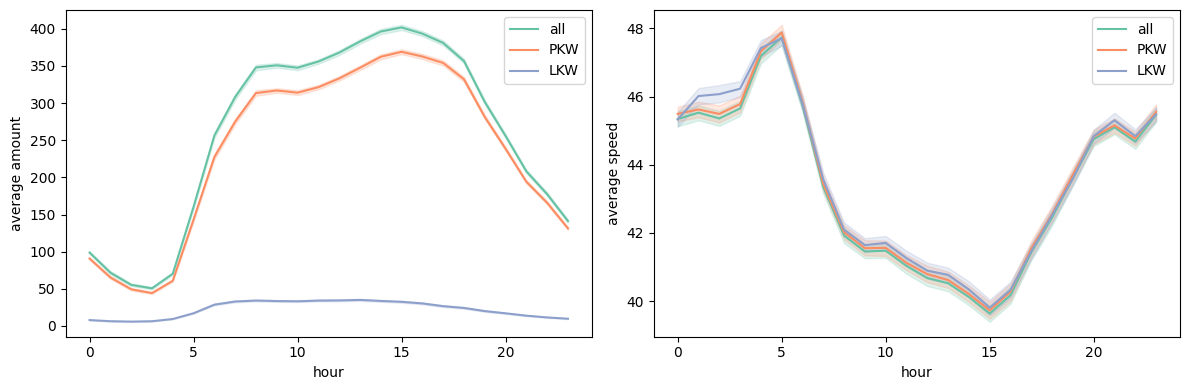

In [384]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.lineplot(x='stunde', y= 'q_kfz_det_hr', label='all', data=traffic_june, ax=axes[0])
sns.lineplot(x='stunde', y= 'q_pkw_det_hr', label='PKW',data=traffic_june, ax=axes[0])
sns.lineplot(x='stunde', y= 'q_lkw_det_hr', label='LKW',data=traffic_june, ax=axes[0])

sns.lineplot(x='stunde', y= 'v_kfz_det_hr', data=traffic_june, label='all', ax=axes[1])
sns.lineplot(x='stunde', y= 'v_pkw_det_hr', data=traffic_june, label='PKW', ax=axes[1])
sns.lineplot(x='stunde', y= 'v_lkw_det_hr', data=traffic_june, label='LKW', ax=axes[1])

axes[0].set_xlabel('hour')
axes[1].set_xlabel("hour")
axes[0].set_ylabel('average amount')
axes[1].set_ylabel("average speed")

plt.tight_layout()
plt.show()

The number of PKWs shows a rapid increase in the morning, reaches a plateau around noon, and then further increases in the afternoon. In contrast, the number of LKWs remains relatively stable throughout the day, without significant fluctuations.
The average speed shows an inverse relationship with the level of traffic. During hours with less traffic, the average speed tends to increase, indicating smoother flow and less congestion on the roads.

## Daily traffic Data for 2021

In [385]:
traffic_2021 = pd.read_sql_table('traffic_2021', 'sqlite:///../traffic.sqlite')
traffic_2021.head()

,detid_15,tag,qualitaet,q_kfz_det_hr,v_kfz_det_hr,q_pkw_det_hr,v_pkw_det_hr,q_lkw_det_hr,v_lkw_det_hr,MQ_KURZNAME,...,MQ_ID15,STRASSE,POSITION,POS_DETAIL,RICHTUNG,SPUR,annotation,LÄNGE (WGS84),BREITE (WGS84),INBETRIEBNAHME
0,100101010000167,01.01.2021,1.0,262.958333,76.279167,259.833333,76.483333,3.125000,56.312500,TE001,...,100201010000077,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,HF_R,Hauptfahrbahn rechte Spur,13.192578,52.433868,2003-02-18
1,100101010000167,02.01.2021,1.0,425.458333,76.316667,415.958333,76.995833,9.500000,67.666667,TE001,...,100201010000077,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,HF_R,Hauptfahrbahn rechte Spur,13.192578,52.433868,2003-02-18
2,100101010000167,03.01.2021,1.0,345.708333,71.070833,337.791667,72.037500,7.916667,61.408333,TE001,...,100201010000077,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,HF_R,Hauptfahrbahn rechte Spur,13.192578,52.433868,2003-02-18
3,100101010000167,04.01.2021,1.0,546.000000,78.025000,481.291667,79.308333,64.708333,72.920833,TE001,...,100201010000077,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,HF_R,Hauptfahrbahn rechte Spur,13.192578,52.433868,2003-02-18
4,100101010000167,05.01.2021,1.0,568.958333,76.570833,508.333333,78.466667,60.625000,68.250000,TE001,...,100201010000077,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,HF_R,Hauptfahrbahn rechte Spur,13.192578,52.433868,2003-02-18


Traffic over the year:

In [386]:
daily_avg = traffic_2021.groupby("tag")[["q_kfz_det_hr","v_kfz_det_hr"]].mean()

Text(0.5, 0, 'day')

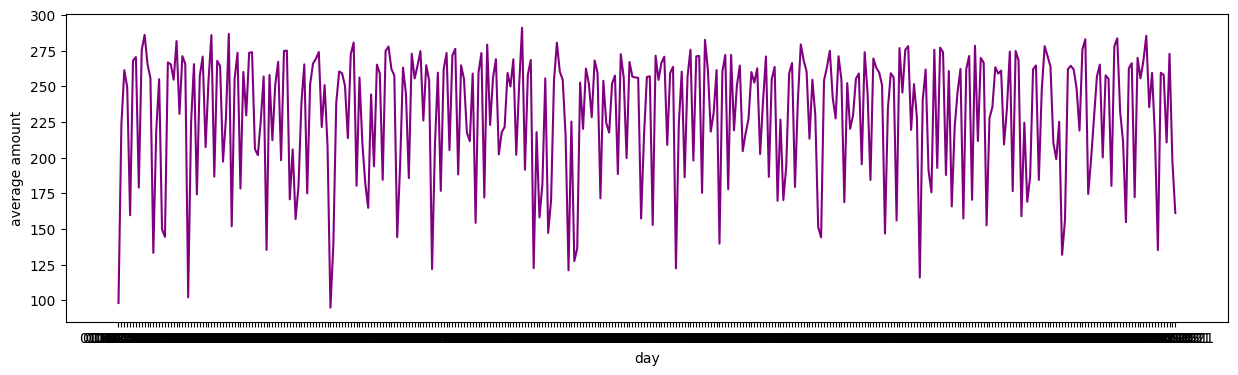

In [396]:
f, ax = plt.subplots(figsize=(15, 4))
sns.lineplot(data=daily_avg, x="tag", y="q_kfz_det_hr", color = 'purple')
plt.ylabel('average amount')
plt.xlabel('day')

Text(0.5, 0, 'day')

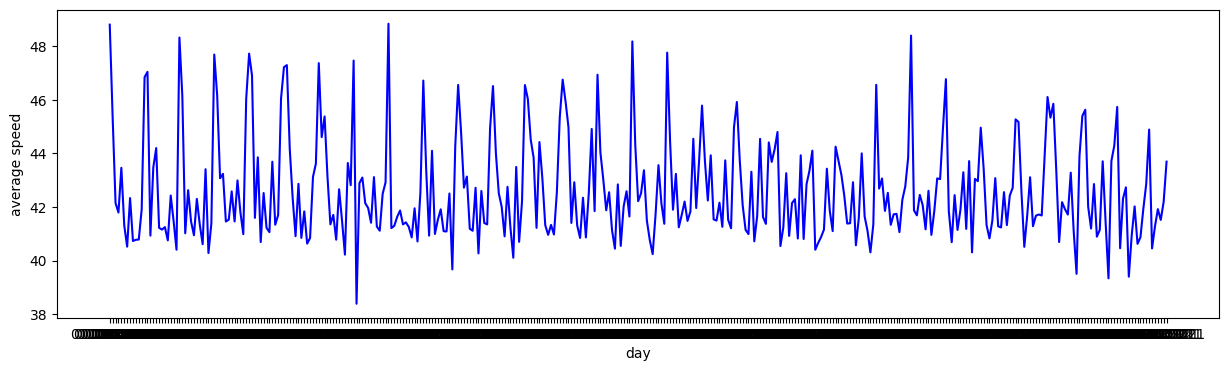

In [397]:
f, ax = plt.subplots(figsize=(15, 4))
sns.lineplot(data=daily_avg, x="tag", y="v_kfz_det_hr", color = 'blue')
plt.ylabel("average speed")
plt.xlabel('day')

There are no significant differences observed across the months. The variations occur predominantly on a weekly basis rather than on a monthly scale. Nevertheless, it must be mentioned that this only includes PKW and LKW.

## Find locations with high traffic

To find locations with particular high or fast traffic we look at the yearly averages of every traffic sensor

In [389]:
traffic_sensors = traffic_2021.groupby('detid_15')[["q_kfz_det_hr","v_kfz_det_hr","q_pkw_det_hr","v_pkw_det_hr","q_lkw_det_hr","v_lkw_det_hr","LÄNGE (WGS84)","BREITE (WGS84)"]].mean()
traffic_sensors.describe()

,q_kfz_det_hr,v_kfz_det_hr,q_pkw_det_hr,v_pkw_det_hr,q_lkw_det_hr,v_lkw_det_hr,LÄNGE (WGS84),BREITE (WGS84)
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,239.596443,42.457792,222.332425,42.559690,17.285348,35.912091,13.388133,52.502504
std,117.844477,10.436542,112.206848,10.543432,23.981083,10.830563,0.075730,0.039157
min,0.184524,2.599775,0.092262,1.685205,0.092262,0.901515,13.156639,52.398253
25%,165.729902,36.629931,152.962518,36.934849,6.213529,30.357383,13.346215,52.481545
50%,243.944595,42.831785,224.619612,42.921621,11.354520,36.520420,13.384701,52.508231
75%,306.982659,48.691962,286.835738,48.889107,17.704100,42.419803,13.432945,52.528842
max,1152.207986,93.299904,1085.388021,96.597820,243.822927,92.058322,13.595328,52.586297


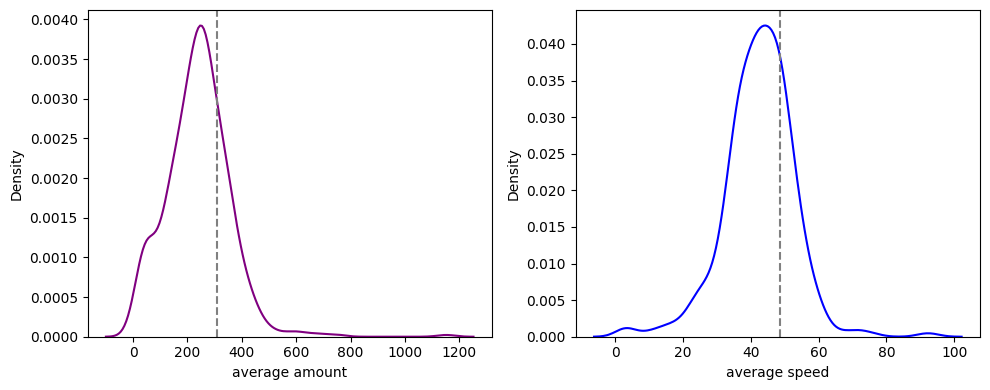

In [390]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.kdeplot(data=traffic_sensors, x="q_kfz_det_hr", color = 'purple', ax=axes[0])
quantile_75_q = traffic_sensors['q_kfz_det_hr'].quantile(0.75)
axes[0].axvline(quantile_75_q, color='grey', linestyle='--', label='75th Percentile')

sns.kdeplot(data=traffic_sensors, x="v_kfz_det_hr", color = 'blue', ax=axes[1])
quantile_75_v = traffic_sensors['v_kfz_det_hr'].quantile(0.75)
axes[1].axvline(quantile_75_v, color='grey', linestyle='--', label='75th Percentile')

axes[0].set_xlabel('average amount')
axes[1].set_xlabel("average speed")

plt.tight_layout()
plt.show()

Locations with more or faster traffic (above 75% quantil):

In [391]:
pd.options.mode.chained_assignment = None

high_traffic = traffic_sensors[(traffic_sensors["q_kfz_det_hr"] > 306.982659)]
high_traffic['label'] = 'high quantity'

fast_traffic = traffic_sensors[(traffic_sensors["v_kfz_det_hr"] > 48.691962)]
fast_traffic['label'] = 'high velocity'

traffic_int = pd.concat([high_traffic, fast_traffic])

In [392]:
accidents2 = accidents[(accidents['UKATEGORIE'] == 'with deaths') | (accidents['UKATEGORIE'] == 'with severely injured')]
accidents2.rename(columns={'YGCSWGS84': 'lat', 'XGCSWGS84': 'long', 'UKATEGORIE': 'label'}, inplace=True)

traffic_int.rename(columns={'BREITE (WGS84)': 'lat', 'LÄNGE (WGS84)': 'long'}, inplace=True)

df = pd.concat([accidents2, traffic_int], axis=0)


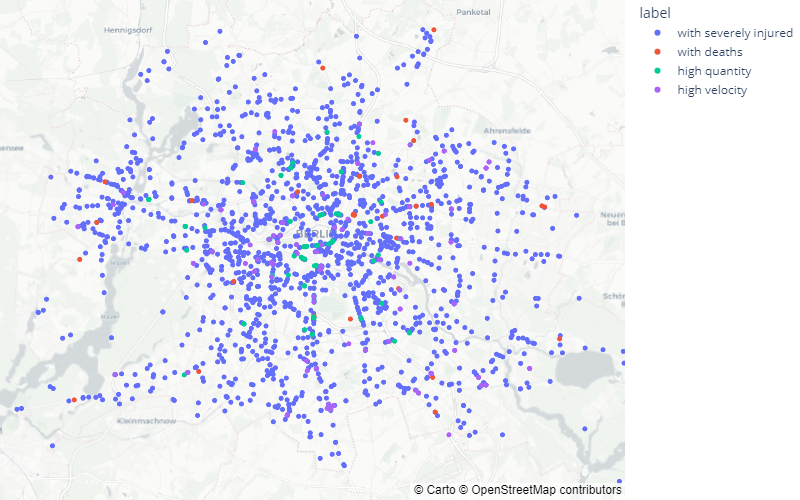

In [393]:
fig = px.scatter_mapbox(df, 
                        lat='lat', 
                        lon='long',  
                        color="label",
                        zoom=9.5, 
                        height=500,
                        width=800)

fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
fig.show("png") #display as image as well as interactive map is not displayed in github

The places with the highest traffic volume are concentrated a little more in the center, while many places with fast traffic are located further outside. We also see again, that there are few severe accidents in the center. 

Lastly, we look at the accidents in July to investiagte the effect of the traffic throughout the day.

In [394]:
accidents_june = accidents[accidents['UMONAT']==6]

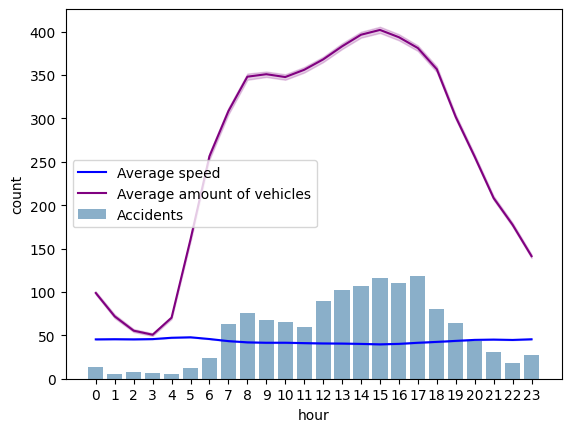

In [398]:
sns.countplot(x='USTUNDE', data=accidents_june, label='Accidents', color='#80B1D3')
sns.lineplot(x='stunde', y ='v_kfz_det_hr', data=traffic_june, color='blue', label='Average speed')
sns.lineplot(x='stunde', y ='q_kfz_det_hr', data=traffic_june, color='purple', label='Average amount of vehicles')

plt.xlabel('hour')
plt.legend()
plt.show()

We can see a clear correlation between the number of accidents and the amount of traffic every hour. The average speed remained very stable.

# Findings 

1.  Involved vehicles: Specific attention should be given to accidents involving cars and bicycles, as they happen very often. Further, especially accidents involving pedestrians or cyclists and larger vehicles should be prevented, as these types of accidents tend to be more fatal.

2. Locations: The districts with the highest number of accidents are located in the central area of Berlin, with Berlin Mitte being the district where most accidents occurred. Neverthess, this is only because of the higher amount of accidents with lightly injured persons. 

3. Time: There are more accidents on weekdays and during the afternoon. Additionally, there are fewer accidents during the winter season. That the traffic is also higher during the week and during the afternoon indicates a correlcation between accidents and the amount of cars and trucks. Eventhough there are less accidents in the winter while the amount of traffic remained the same it has to be mentioned, that there probably less pedestrians and bikers on the streets. 